In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime
import re

%matplotlib inline
sns.set(style="darkgrid", font_scale=1.8)

In [2]:
df = pd.read_csv('TLC_New_Driver_Application_Status.csv')

In [3]:
df.head(10)

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
0,5904932,HDR,08/16/2018,Incomplete,Not Applicable,Complete,Needed,Complete,Needed,Complete,Not Applicable,10/27/2018 12:00:30 PM
1,5884719,HDR,07/01/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM
2,5904155,HDR,08/14/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM
3,5903338,HDR,08/14/2018,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed,10/27/2018 12:00:30 PM
4,5921556,HDR,09/24/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM
5,5919921,HDR,09/07/2018,Incomplete,Not Applicable,Needed,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,10/27/2018 12:00:30 PM
6,5918372,HDR,08/27/2018,Incomplete,Not Applicable,Complete,Needed,Complete,Needed,Needed,Not Applicable,10/27/2018 12:00:30 PM
7,5889056,HDR,07/22/2018,Denied,Not Applicable,Complete,Needed,Needed,Needed,Complete,Copy of DMV license needed,10/27/2018 12:00:30 PM
8,5890885,HDR,07/30/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM
9,5890517,HDR,07/28/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM


In [4]:
df.tail(10)

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated
5247,5924209,HDR,10/19/2018,Incomplete,Not Applicable,Needed,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,10/27/2018 12:00:30 PM
5248,5922692,HDR,10/04/2018,Incomplete,Not Applicable,Complete,Complete,Complete,Needed,Complete,Not Applicable,10/27/2018 12:00:30 PM
5249,5921446,HDR,09/23/2018,Incomplete,Not Applicable,Complete,Complete,Complete,Complete,Complete,Open items needed. Visit www.nyc.gov/tlcup for...,10/27/2018 12:00:30 PM
5250,5921905,HDR,09/27/2018,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Complete,Fingerprints needed,10/27/2018 12:00:30 PM
5251,5920202,HDR,09/11/2018,Incomplete,Not Applicable,Complete,Needed,Complete,Needed,Needed,Copy of DMV license needed,10/27/2018 12:00:30 PM
5252,5923247,HDR,10/10/2018,Incomplete,Not Applicable,Complete,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,10/27/2018 12:00:30 PM
5253,5922766,HDR,10/04/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM
5254,5923834,HDR,10/16/2018,Incomplete,Not Applicable,Complete,Needed,Complete,Needed,Needed,Fingerprints needed,10/27/2018 12:00:30 PM
5255,5922584,HDR,10/03/2018,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM
5256,5923564,HDR,10/12/2018,Incomplete,Not Applicable,Needed,Needed,Needed,Needed,Needed,Fingerprints needed; Copy of DMV license needed,10/27/2018 12:00:30 PM


In [5]:
df['App Date'] =  pd.to_datetime(df['App Date'])

In [6]:
df['month_year'] = df['App Date'].dt.to_period('M')

In [7]:
df.head()

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated,month_year
0,5904932,HDR,2018-08-16,Incomplete,Not Applicable,Complete,Needed,Complete,Needed,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-08
1,5884719,HDR,2018-07-01,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-07
2,5904155,HDR,2018-08-14,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-08
3,5903338,HDR,2018-08-14,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed,10/27/2018 12:00:30 PM,2018-08
4,5921556,HDR,2018-09-24,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-09


In [8]:
df_sum = df.groupby('Type')['App No'].nunique()

In [9]:
df_sum.head()

Type
HDR    5235
PDR      17
VDR       5
Name: App No, dtype: int64

In [10]:
df.head()

,App No,Type,App Date,Status,FRU Interview Scheduled,Drug Test,WAV Course,Defensive Driving,Driver Exam,Medical Clearance Form,Other Requirements,Last Updated,month_year
0,5904932,HDR,2018-08-16,Incomplete,Not Applicable,Complete,Needed,Complete,Needed,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-08
1,5884719,HDR,2018-07-01,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-07
2,5904155,HDR,2018-08-14,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-08
3,5903338,HDR,2018-08-14,Incomplete,Not Applicable,Needed,Needed,Complete,Needed,Needed,Fingerprints needed,10/27/2018 12:00:30 PM,2018-08
4,5921556,HDR,2018-09-24,Approved - License Issued,Not Applicable,Complete,Complete,Complete,Complete,Complete,Not Applicable,10/27/2018 12:00:30 PM,2018-09


Text(0.5,1,'Number of Applications by Type')

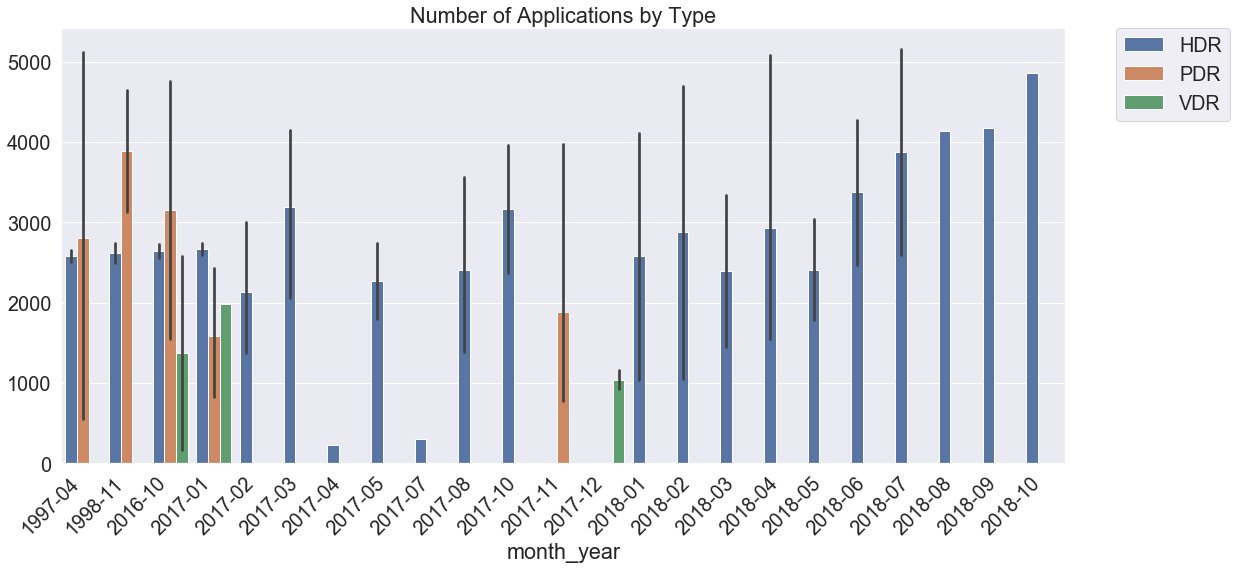

In [11]:
fig, ax = plt.subplots(figsize = (18,8)) 
fig = sns.barplot(x="month_year", y=df.index, hue='Type', data=df)
x_dates = df['App Date'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of Applications by Type')

Text(0.5,1,'Number of Application in Each Status')

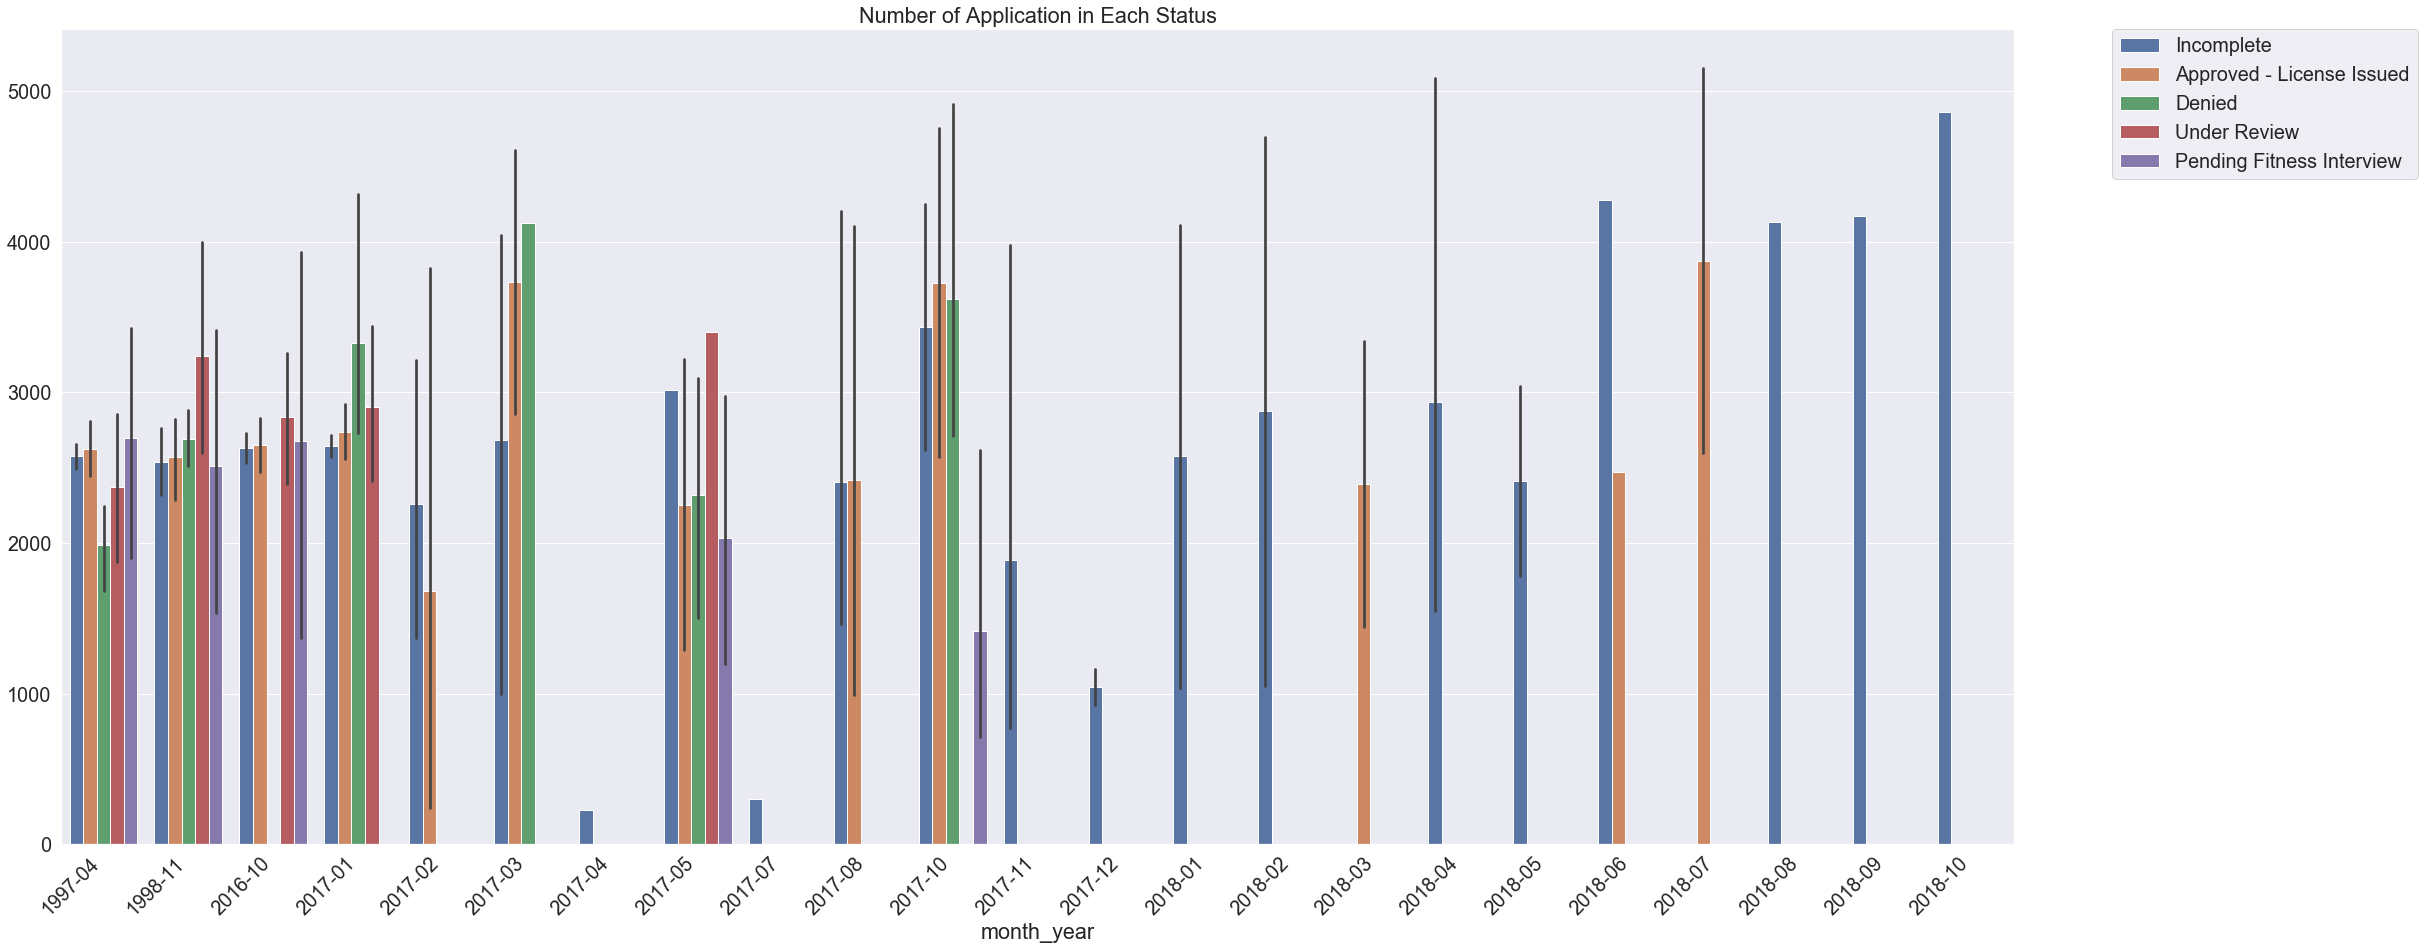

In [12]:
fig, ax = plt.subplots(figsize = (35,15)) 
fig = sns.barplot(x="month_year", y=df.index, hue='Status', data=df)
x_dates = df['App Date'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Number of Application in Each Status")

Text(0.5,1,'Total Applications By Status')

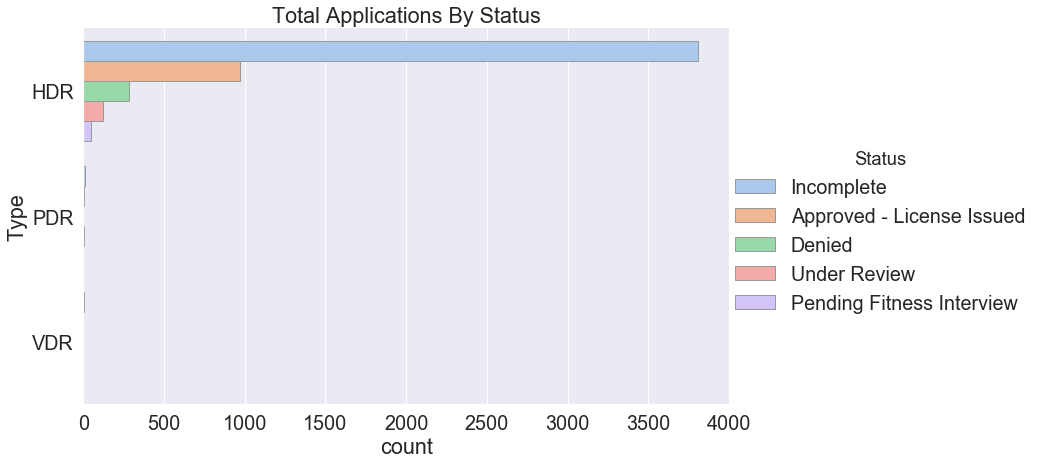

In [13]:
ab = sns.catplot(y="Type", hue="Status", kind="count",
            palette="pastel", edgecolor=".6", height=6, aspect=1.8,
            data=df)
plt.title('Total Applications By Status')